In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans # Our clustering algorithm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from numpy.core.defchararray import add
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load data set
data = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fktp_not_transformation.csv')
data.drop(['Unnamed: 0', 'ID Kunjungan', 'Nomor Peserta', 'FKTP-tanggal datang', 'FKTP-tanggal pulang', 'Segmen Peserta yang Terdaftar', 'Kepemilikan Faskes yang Terdaftar', 
         'Jenis Faskes yang Terdaftar', 'Provinsi Peserta Terdaftar', 'Kab/Kota Peserta Terdaftar', 'FKTP-Kab/Kota Faskes Rujukan', 'FKTP-Kab/Kota Faskes', 'FKTP-Provinsi Faskes Rujukan', 'FKTP-Kab/Kota Faskes Rujukan', 'FKTP-Kepemilikan Faskes Rujukan', 'FKTP-Jenis Faskes Rujukan',
        'FKTP-Jenis Kunjungan', 'FKTP-Poli Faskes Rujukan', 'FKTP-Provinsi Faskes', 'Status Kawin', 'Hubungan Keluarga', 'FKTP-Year', 'FKTP-Month', 'FKTP-Kode dan Nama Diagnosis', 'Kapitasi?', 'FKTP-Biaya Verifikasi', 'Umur'], axis=1, inplace=True)

In [3]:
data['FKTP-Weekend?'] = data['FKTP-Weekend?'].astype('category')
data['FKTP-Quarter'] = data['FKTP-Quarter'].astype('category')

In [4]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

# Get dummies
X = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [5]:
data_cat = X.assign(new=add('', np.arange(1, len(data_cat) + 1).astype(str)))
data_num = data_num.assign(new=add('', np.arange(1, len(data_num) + 1).astype(str)))

data_final = pd.concat([data_cat, data_num], axis=1)
data_final.drop(['new'], axis=1, inplace=True)


# Let's scale the data first
scaler = StandardScaler()
normalized_df = scaler.fit_transform(data_final)

### ** K-Means**

Menentukan jumlah cluster dengan elbow method

In [7]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(normalized_df)
    kmeanModel.fit(normalized_df)
 
    distortions.append(sum(np.min(cdist(normalized_df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / normalized_df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(normalized_df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / normalized_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

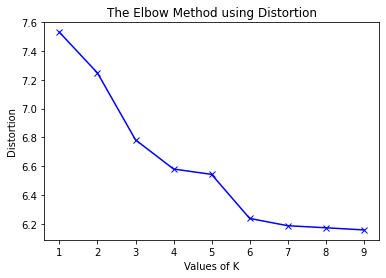

In [8]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

2.346548844762792
2.3931628686969084
2.104107050224869
2.0179108417953677
1.813442922364338
2.0685249502600986
1.89026442110557


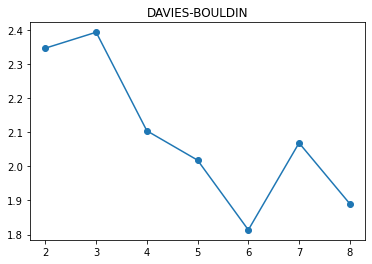

In [9]:
from sklearn.metrics import davies_bouldin_score
k = [2, 3, 4, 5, 6, 7, 8]
scores = []

for i in k:
    y_pred = KMeans(n_clusters = i, max_iter=1000, random_state = 43).fit_predict(normalized_df)
    score = davies_bouldin_score(normalized_df, y_pred)
    scores.append(score)
    print(score)

plt.plot(k, scores, 'o-')
plt.title('DAVIES-BOULDIN')
plt.show()

726490.6526666672
858245.395495061
1000408.2901043548
1419396.0972717325
2696104.73985119
2635492.00399133
2700306.2074287655


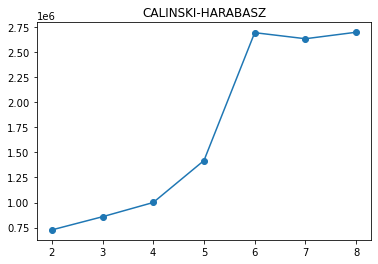

In [20]:
from sklearn.metrics import calinski_harabasz_score
k = [2, 3, 4, 5, 6, 7, 8]
scores = []
 
for i in k:
    y_pred = KMeans(n_clusters = i, max_iter=1000, random_state = 43).fit_predict(final_component_mca)
    score = calinski_harabasz_score(final_component_mca, y_pred)
    scores.append(score)
    print(score)
 
plt.plot(k, scores, 'o-')
plt.title('CALINSKI-HARABASZ')
plt.show()

##### n=2

In [10]:
kmeans_pca_2 = KMeans(n_clusters = 2, init ='k-means++', random_state=42)

In [11]:
# fit data dengan model kmeans pca
kmeans_pca_2.fit(normalized_df)

KMeans(n_clusters=2, random_state=42)

In [32]:
kmeans_pca_2.inertia_

2604267790778402.0

#### n=3

In [7]:
kmeans_pca_3 = KMeans(n_clusters = 3, init ='k-means++', random_state=42)

In [8]:
# fit data dengan model kmeans pca
kmeans_pca_3.fit(normalized_df)

KMeans(n_clusters=3, random_state=42)

In [14]:
kmeans_pca_3.inertia_

177934407.77547994

In [64]:
# without dimensionality reduction
from sklearn.metrics import silhouette_score

print(silhouette_score(normalized_df, kmeans_pca_3.labels_))

0.13760028982077974


#### n=4

In [6]:
kmeans_pca_4 = KMeans(n_clusters = 4, init ='k-means++', random_state=42)

In [7]:
# fit data dengan model kmeans pca
kmeans_pca_4.fit(normalized_df)

KMeans(n_clusters=4, random_state=42)

In [17]:
kmeans_pca_4.inertia_

170142231.48293313

In [8]:
# without dimensionality reduction

from sklearn.metrics import silhouette_score

print(silhouette_score(normalized_df, kmeans_pca_4.labels_))

0.13062309584510512


#### n=5

In [10]:
from sklearn.cluster import KMeans # Our clustering algorithm
kmeans_pca_5 = KMeans(n_clusters = 5, init ='k-means++', random_state=42)

In [11]:
# fit data dengan model kmeans pca
kmeans_pca_5.fit(normalized_df)

KMeans(n_clusters=5, random_state=42)

In [20]:
kmeans_pca_5.inertia_

165589054.18861982

In [12]:
# without dimensionality reduction

from sklearn.metrics import silhouette_score

print(silhouette_score(normalized_df, kmeans_pca_5.labels_))

0.10909758864954261


#### n=6

In [13]:
kmeans_pca_6 = KMeans(n_clusters = 6, init ='k-means++', random_state=42)

In [14]:
# fit data dengan model kmeans pca
kmeans_pca_6.fit(normalized_df)

KMeans(n_clusters=6, random_state=42)

In [23]:
kmeans_pca_6.inertia_

161983254.25476003

In [15]:
# without dimensionality reduction

# mca only
from sklearn.metrics import silhouette_score

print(silhouette_score(normalized_df, kmeans_pca_6.labels_))

0.11054630923803341


#### n=7

In [24]:
kmeans_pca_7 = KMeans(n_clusters = 7, init ='k-means++', random_state=42)

In [22]:
# fit data dengan model kmeans pca
kmeans_pca_7.fit(normalized_df)

KMeans(n_clusters=7, random_state=42)

In [49]:
kmeans_pca_7.inertia_

139427.13966253086

In [ ]:
# mca only
from sklearn.metrics import silhouette_score

print(silhouette_score(normalized_df, kmeans_pca_7.labels_))

In [ ]:
# from sklearn.metrics import silhouette_score
# k = [2, 3, 4, 5, 6, 7, 8]
# score=[]
# for n_cluster in k:
#     kmeans = KMeans(n_clusters=n_cluster).fit(final_principal)
#     score.append(silhouette_score(final_principal,kmeans.labels_))

# plt.plot(k, score, 'o-')
# plt.xlabel("Value for k")
# plt.ylabel("Silhouette score")
# plt.title('Silhouette Method')
# plt.show()

# VISUALISASI CLUSTER

n=3

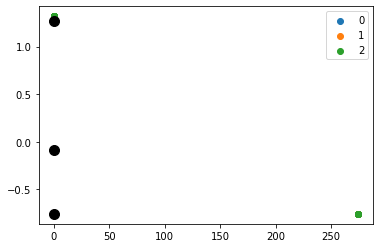

In [25]:
# Getting the Centroids
centroids = kmeans_pca_3.cluster_centers_
X = np.array(normalized_df)
label = kmeans_pca_3.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

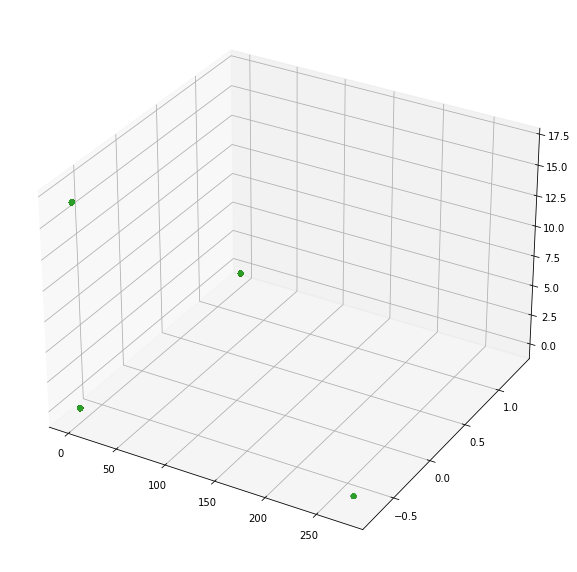

In [26]:
label = kmeans_pca_3.labels_
X = np.array(normalized_df)
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
# ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
# ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
# ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(X[label == 6,0],X[label == 6,1],X[label == 6,2])

# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])


n=4

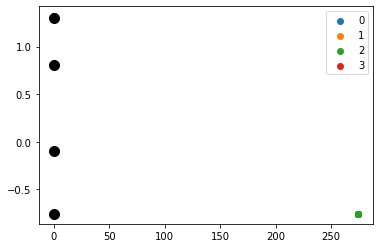

In [27]:
# Getting the Centroids
centroids = kmeans_pca_4.cluster_centers_
X = np.array(normalized_df)
label = kmeans_pca_4.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

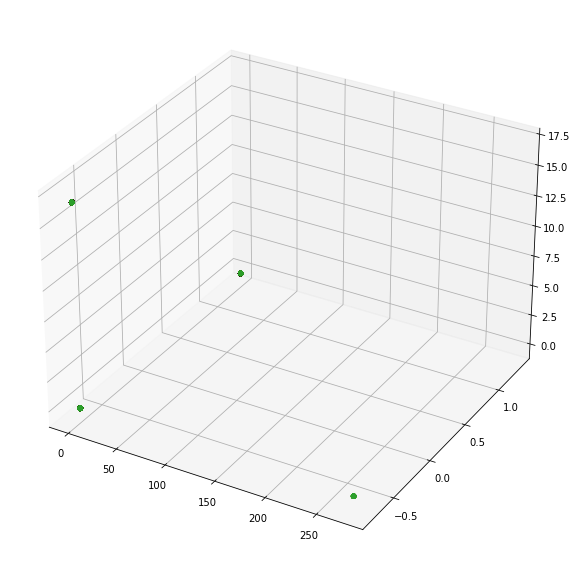

In [28]:
label = kmeans_pca_4.labels_
X = np.array(normalized_df)
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
# ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
# ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(X[label == 6,0],X[label == 6,1],X[label == 6,2])

# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])


n=5

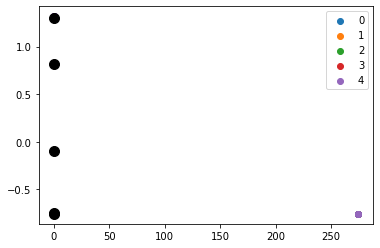

In [29]:
# Getting the Centroids
centroids = kmeans_pca_5.cluster_centers_
X = np.array(normalized_df)
label = kmeans_pca_5.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

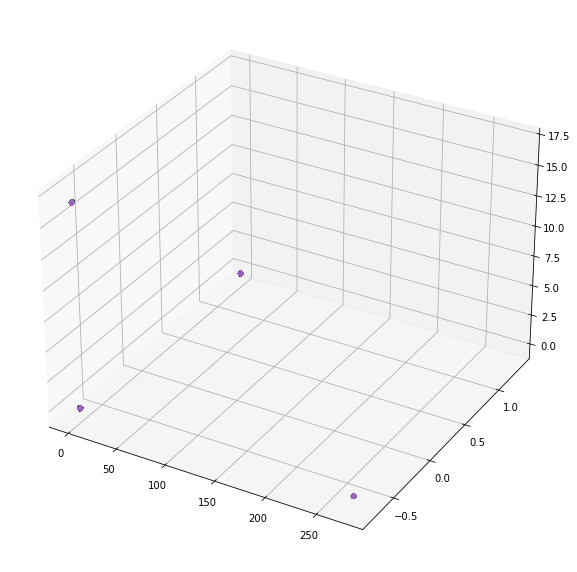

In [30]:
label = kmeans_pca_5.labels_
X = np.array(normalized_df)
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
# ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(X[label == 6,0],X[label == 6,1],X[label == 6,2])

# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])


n= 6

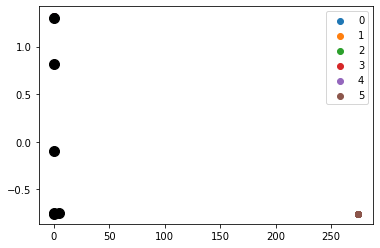

In [31]:
# Getting the Centroids
centroids = kmeans_pca_6.cluster_centers_
X = np.array(normalized_df)
label = kmeans_pca_6.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

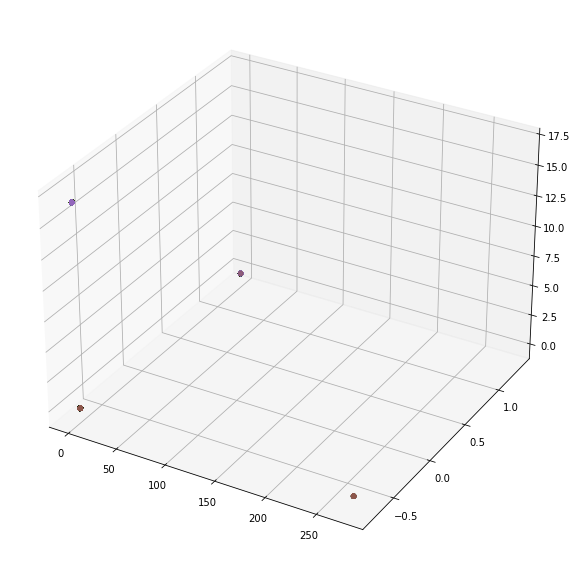

In [32]:
label = kmeans_pca_6.labels_
X = np.array(normalized_df)
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
ax.scatter(X[label == 6,0],X[label == 6,1],X[label == 6,2])

# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])


n= 7

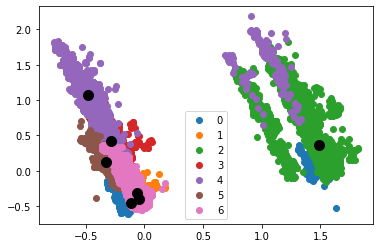

In [23]:
# Getting the Centroids
centroids = kmeans_pca_7.cluster_centers_
X = np.array(normalized_df)
label = kmeans_pca_7.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

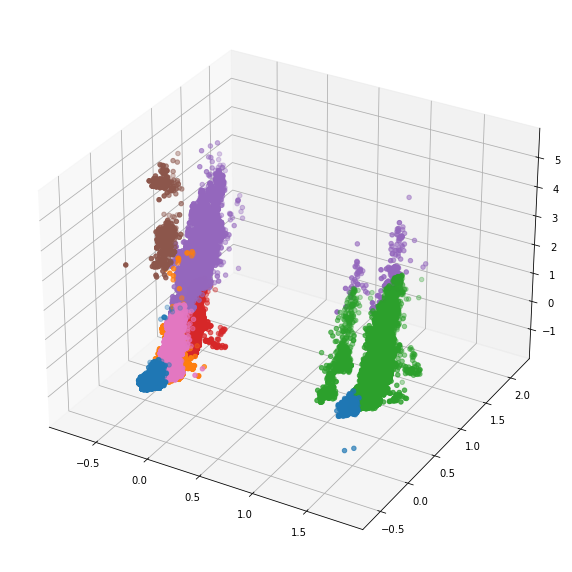

In [24]:
label = kmeans_pca_7.labels_
X = np.array(normalized_df)
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
ax.scatter(X[label == 6,0],X[label == 6,1],X[label == 6,2])

# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])


Analisis Hasil

In [17]:
fkrtl_segm_pca_kmeans = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fktp_not_transformation.csv')

In [54]:
# fkrtl_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(final_component_mca)], axis = 1)
# fkrtl_segm_pca_kmeans.columns.values[-5: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']

fkrtl_segm_pca_kmeans['Cluster'] = kmeans_pca_6.labels_

In [55]:
fkrtl_segm_pca_kmeans['Segment'] = fkrtl_segm_pca_kmeans['Cluster'].map({0:'first', 1:'second', 2:'third', 3: 'fourth', 4:'fifth', 5:'sixth'})

In [56]:
bins = np.linspace(min(fkrtl_segm_pca_kmeans['Jumlah Tindakan Non-Kapitasi']), max(fkrtl_segm_pca_kmeans['Jumlah Tindakan Non-Kapitasi']), 6)
kategori = ['sangat sedikit', 'sedikit', 'standar', 'banyak', 'sangat banyak']
fkrtl_segm_pca_kmeans['jumlah_tindakan_non_kapitasi_binned'] = pd.cut(fkrtl_segm_pca_kmeans['Jumlah Tindakan Non-Kapitasi'], bins, labels=kategori, include_lowest=True)

# data[['jumlah_tindakan_non_kapitasi_binned', 'Jumlah Tindakan Non-Kapitasi']][1000:1110]

bins = np.linspace(min(fkrtl_segm_pca_kmeans['FKTP-Biaya Tagih']), max(fkrtl_segm_pca_kmeans['FKTP-Biaya Tagih']), 6)
kategori = ['sangat murah', 'murah', 'standar', 'mahal', 'sangat mahal']
fkrtl_segm_pca_kmeans['biaya_tagih_binned'] = pd.cut(fkrtl_segm_pca_kmeans['FKTP-Biaya Tagih'], bins, labels=kategori, include_lowest=True)

bins = np.linspace(min(fkrtl_segm_pca_kmeans['FKTP-Lama Kunjungan']), max(fkrtl_segm_pca_kmeans['FKTP-Lama Kunjungan']), 6)
kategori = ['sangat sebentar', 'sebentar', 'standar', 'lama', 'sangat lama']
fkrtl_segm_pca_kmeans['lama_kunjungan_binned'] = pd.cut(fkrtl_segm_pca_kmeans['FKTP-Lama Kunjungan'], bins, labels=kategori, include_lowest=True)

In [53]:
fkrtl_segm_pca_kmeans.to_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/hasil cluster/fktp_without_dimensionality_reduction_5.csv')

In [3]:
fkrtl_segm_pca_kmeans = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/hasil cluster/fktp-pca-mca-kmeans-full_5.csv')

## Analisis Hasil Custer

In [57]:
# Hasil join dengan indikator left_only
options = ['first'] 

# selecting rows based on condition 
cluster1 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster1.head()

In [58]:
# Hasil join dengan indikator left_only
options = ['second'] 

# selecting rows based on condition 
cluster2 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster2.head()

In [59]:
# Hasil join dengan indikator left_only
options = ['third'] 

# selecting rows based on condition 
cluster3 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster3

In [60]:
# Hasil join dengan indikator left_only
options = ['fourth'] 

# selecting rows based on condition 
cluster4 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster4.head()

In [61]:
# Hasil join dengan indikator left_only
options = ['fifth'] 

# selecting rows based on condition 
cluster5 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster5.head()

N=3

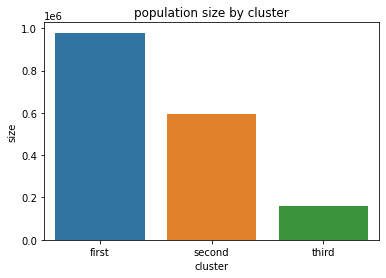

In [26]:
# Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fkrtl_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

In [27]:
print('Number of samples in:')
for cluster, df_cluster in fkrtl_segm_pca_kmeans.groupby('Segment'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster first -> 978995
cluster second -> 593321
cluster third -> 161439


N=4

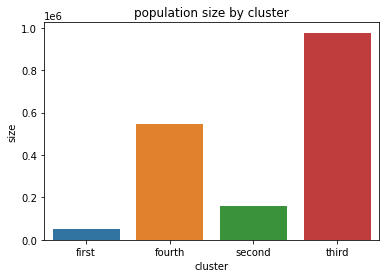

In [42]:
# Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fkrtl_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

In [41]:
print('Number of samples in:')
for cluster, df_cluster in fkrtl_segm_pca_kmeans.groupby('Segment'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster first -> 51937
cluster fourth -> 544494
cluster second -> 160306
cluster third -> 977018


N=5

In [52]:
print('Number of samples in:')
for cluster, df_cluster in fkrtl_segm_pca_kmeans.groupby('Segment'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster fifth -> 160306
cluster first -> 452213
cluster fourth -> 51917
cluster second -> 545128
cluster third -> 524191


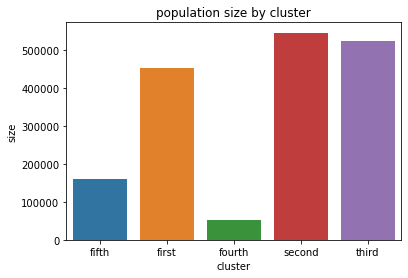

In [51]:
# Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fkrtl_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

N=6

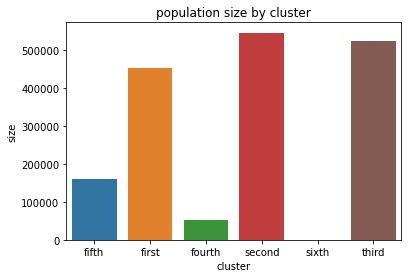

In [62]:
# Check size of each cluster - Are they all representative ?
import seaborn as sns
cluster_size = []
for centroid, cluster_df in fkrtl_segm_pca_kmeans.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

In [63]:
print('Number of samples in:')
for cluster, df_cluster in fkrtl_segm_pca_kmeans.groupby('Segment'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster fifth -> 160307
cluster first -> 452217
cluster fourth -> 51744
cluster second -> 545134
cluster sixth -> 491
cluster third -> 523862


In [15]:
(cluster1['FKTP-Segmen Peserta'].value_counts()/fkrtl_segm_pca_kmeans['FKTP-Segmen Peserta'].value_counts())*100

BUKAN PEKERJA    15.055971
MISSING          14.248705
PBI APBD          6.606435
PBI APBN          3.386502
PBPU             16.189700
PPU               8.993419
Name: FKTP-Segmen Peserta, dtype: float64

In [73]:
cluster5['Non-Kapitasi?'].value_counts()

No    32428
Name: Non-Kapitasi?, dtype: int64

In [57]:
fkrtl_segm_pca_kmeans['Non-Kapitasi?'].value_counts()

No     1665895
Yes      67860
Name: Non-Kapitasi?, dtype: int64

In [138]:
print(len(cluster5)/len(cluster5['Nomor Peserta'].value_counts()))

2.4572251269227854


In [ ]:
fkrtl_segm_pca_kmeans['FKTP-Segmen Peserta'].value_counts()

In [ ]:
cluster3['FKTP-Kode dan Nama Diagnosis'].value_counts()

In [67]:
for col in fkrtl_segm_pca_kmeans:
    print((cluster1[col].value_counts(ascending=False))/fkrtl_segm_pca_kmeans[cols].value_counts())*100

2047       1
217792     1
916245     1
914196     1
1306826    1
          ..
627815     1
623717     1
625764     1
633952     1
0          1
Name: Unnamed: 0, Length: 593511, dtype: int64
0     542269
1      26807
2      22192
3       1311
4        783
5         66
7         50
6         13
9         11
8          6
10         3
Name: Jumlah Tindakan Non-Kapitasi, dtype: int64
2016-11-07    1633
2016-04-04    1595
2016-10-17    1594
2016-04-11    1591
2016-10-10    1586
              ... 
2015-05-31      78
2016-01-31      78
2016-07-31      78
2015-12-27      77
2015-07-17      62
Name: FKTP-tanggal datang, Length: 731, dtype: int64
2016-11-07    1634
2016-10-10    1607
2016-04-11    1599
2016-04-04    1578
2016-12-13    1576
              ... 
2015-10-04      83
2015-08-09      79
2015-12-27      77
2015-09-27      73
2015-07-17      67
Name: FKTP-tanggal pulang, Length: 731, dtype: int64
JAWA TIMUR                  77347
JAWA TENGAH                 73157
JAWA BARAT                

Puskesmas         496422
Dokter Umum        53469
Klinik Pratama     43620
Name: Jenis Faskes yang Terdaftar, dtype: int64
JAWA TIMUR                  76418
JAWA TENGAH                 72641
JAWA BARAT                  70571
SULAWESI SELATAN            31865
SUMATERA UTARA              27463
DKI JAKARTA                 21584
NUSA TENGGARA TIMUR         21316
LAMPUNG                     21072
SUMATERA SELATAN            19351
SULAWESI TENGGARA           15936
BANTEN                      15305
SUMATERA BARAT              15128
RIAU                        14226
NANGGROE ACEH DARUSSALAM    13805
KALIMANTAN SELATAN          13463
D I YOGYAKARTA              13306
KALIMANTAN BARAT            12366
JAMBI                       11990
BALI                        10589
NUSA TENGGARA BARAT         10372
SULAWESI TENGAH             10123
BENGKULU                     9535
MALUKU UTARA                 8730
KALIMANTAN TENGAH            7438
SULAWESI BARAT               6870
KALIMANTAN TIMUR           